# Visualisation of the SiPM Readout - Event Based 

This shows the output for the clicked SiPM for a given event.

In [1]:
import uproot
file_path = './single_electron_photons.root'
f = uproot.open(file_path)
#tree_scint = f["ScintSim_tree"]
tree_data = f["event_tree"]
tree_photon = f["photon_tree"]
#branches_scint = tree_scint.arrays()
branches_data = tree_data.arrays()
#branches_meta = tree_meta.arrays()
branches_photon = tree_photon.arrays()

To get the data for each event, call `time_vuv[event_nr][SiPM_id]`

Define the event you want to look at as `event_nr`

In [2]:
event_nr = 0

In [17]:
#time_vuv = branches_scint['total_time_vuv'][event_nr]
hit_start_x = branches_photon['photon_final_x'][event_nr]
hit_start_y = branches_photon['photon_final_y'][event_nr]
hit_start_z = branches_photon['photon_final_z'][event_nr]
hit_start_t = branches_photon['photon_final_t'][event_nr]

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
import plotly.express as px
import csv
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "browser"
import pandas as pd

We have to add the hit entries to the things we plot in the Scatter plot, as we can only call it once

In [18]:
x = hit_start_x.to_list()
y = hit_start_y.to_list()
z = hit_start_z.to_list()
t = hit_start_t.to_list()

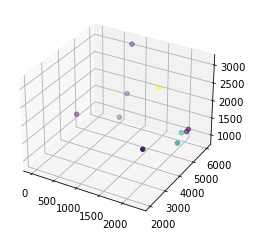

In [22]:

ax = plt.axes(projection ="3d")
ax.scatter3D(x[0:10],y[0:10],z[0:10],c=t[0:10])

In [21]:
show()

NameError: name 'show' is not defined

In [29]:
n=100
fig = go.FigureWidget(data=[go.Scatter3d(x=x[0:n], y=y[0:n], z=z[0:n],mode='markers')])

scatter = fig.data[0]
colors = t[0:n]
scatter.marker.color = colors
marker_size = [3] * (len(x))
scatter.marker.size = marker_size
scatter.marker.line.width = 0
fig.layout.hovermode = 'closest'

In [32]:
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
                    color='petal_length', symbol='species')
fig.show()

AttributeError: 'FigureWidget' object has no attribute 'colorbar'

In [51]:
n = 100000
zipped = list(zip(x[0:n], y[0:n], z[0:n] ,t[0:n]))
df = pd.DataFrame(zipped, columns=['x', 'y', 'z', 't'])
fig = px.scatter_3d(df, x='x', y='y', z='z',
                    color='t')
fig.update_traces(marker_size = 3)
fig.show()


11:50:15 INFO: Opening in existing instance


In [39]:
fig

11:43:49 INFO: Opening in existing instance


(array([161567., 437589., 249999., 129178.,  75210.,  50593.,  38871.,
         32487.,  29182.,  27269.,  26083.,  24777.,  24409.,  23769.,
         23408.,  22973.,  22686.,  22066.,  22137.,  21573.,  21327.,
         21014.,  20974.,  20601.,  20141.,  19948.,  19649.,  19464.,
         19311.,  19157.,  18730.,  18615.,  18243.,  18079.,  17854.,
         17450.,  17120.,  16897.,  16899.,  16596.,  16349.,  16052.,
         15937.,  15768.,  15404.,  15296.,  14919.,  15046.,  14441.,
         14664.,  14342.,  14118.,  14123.,  14016.,  13490.,  13344.,
         13365.,  13115.,  12996.,  12558.,  12701.,  12235.,  12387.,
         12153.,  11975.,  11700.,  11562.,  11328.,  11412.,  11035.,
         10941.,  10870.,  10612.,  10580.,  10441.,  10122.,  10142.,
         10144.,   9934.,   9565.,   9572.,   9431.,   9244.,   9204.,
          9042.,   9010.,   8856.,   8778.,   8525.,   8710.,   8273.,
          8153.,   8238.,   8113.,   7856.,   7707.,   7892.,   7754.,
      

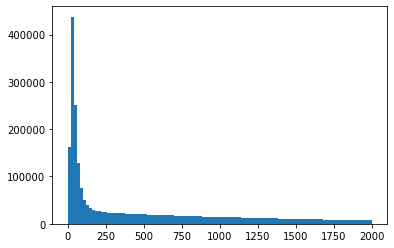

In [48]:
plt.hist(t, range=(0,2000), bins = 100)